In [1]:
import pandas as pd
import numpy as np
from collections import Counter
train_raw = pd.read_csv("C:/Users/HP/analytics 102/Train_A102.csv")
test_raw = pd.read_csv("C:/Users/HP/analytics 102/Test_A102.csv")

In [3]:
train_raw['source'] = 'train'
test_raw['source'] = 'test'

In [4]:
data = pd.concat([train_raw,test_raw],ignore_index = True)
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [5]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [6]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

In [7]:
data.nunique()

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3493
Item_Type                       16
Item_Visibility              13006
Item_Weight                    415
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      3
Outlet_Type                      4
source                           2
dtype: int64

In [8]:
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type']

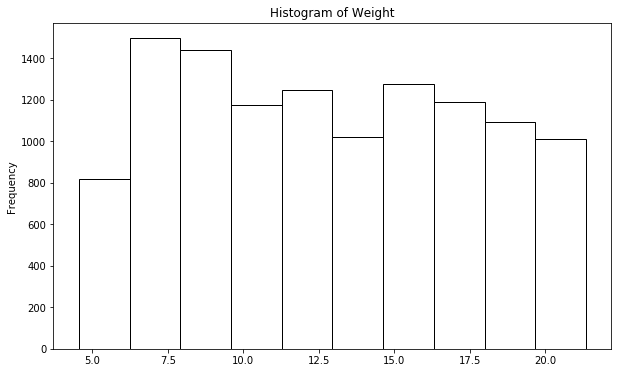

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
data['Item_Weight'].plot(kind = 'hist', color = 'white', edgecolor = 'black', figsize = (10,6), title = 'Histogram of Weight')

In [9]:
itm_avg_weight = data.groupby('Item_Identifier')['Item_Weight'].mean()
miss_bool = data['Item_Weight'].isnull() 
data.Item_Weight.fillna(0, inplace = True)
for index, row in data.iterrows():
    if(row.Item_Weight == 0):
        data.loc[index, 'Item_Weight'] = itm_avg_weight[row.Item_Identifier]

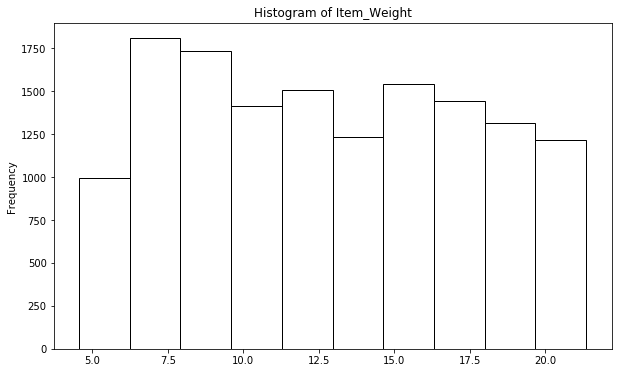

In [12]:
data.Item_Weight.plot(kind='hist', color='white', edgecolor='black', figsize=(10,6), title='Histogram of Item_Weight')


In [13]:
data.groupby('Outlet_Identifier')['Outlet_Size'].value_counts(dropna = False)

Outlet_Identifier  Outlet_Size
OUT010             NaN             925
OUT013             High           1553
OUT017             NaN            1543
OUT018             Medium         1546
OUT019             Small           880
OUT027             Medium         1559
OUT035             Small          1550
OUT045             NaN            1548
OUT046             Small          1550
OUT049             Medium         1550
Name: Outlet_Size, dtype: int64

In [12]:
data.groupby('Outlet_Type')['Outlet_Size'].value_counts(dropna= False
                                                       )

Outlet_Type        Outlet_Size
Grocery Store      NaN             925
                   Small           880
Supermarket Type1  Small          3100
                   NaN            3091
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [14]:
data.loc[data['Outlet_Identifier'].isin(['OUT010','OUT017','OUT045']),'Outlet_Size'] = 'Small'
data.Outlet_Size.value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

In [15]:
data.loc[data['Item_Visibility']==0,'Item_Visibility'] = np.nan
IV_mean = data.groupby('Item_Identifier')['Item_Visibility'].mean()

In [16]:
data['Item_Visibility'].fillna(0,inplace = True)
for index,row in data.iterrows():
    if (row['Item_Visibility']==0):
        data.loc[index,'Item_Visibility'] = IV_mean[row['Item_Identifier']]
data.Item_Visibility.describe()

count    14204.000000
mean         0.070458
std          0.050086
min          0.003575
25%          0.031381
50%          0.058064
75%          0.098042
max          0.328391
Name: Item_Visibility, dtype: float64

In [17]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                          'DR':'Drinks',
                                                          'NC':'Non-Consumable'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [18]:
data['Outlet_Year'] = 2013-data['Outlet_Establishment_Year']
data['Outlet_Year'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Year, dtype: float64

In [19]:
 data['MRP_Factor'] = pd.cut(data.Item_MRP, [0,70,130,201,400], labels=['Low', 'Medium', 'High', 'Very High'])

In [20]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [21]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                            'reg':'Regular',
                                                            'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [22]:
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet', 'MRP_Factor']
for i in var:
    data[i] = le.fit_transform(data[i])

In [25]:
data = pd.get_dummies(data, columns = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet', 'MRP_Factor'])

In [26]:
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Outlet_Year,...,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,MRP_Factor_0,MRP_Factor_1,MRP_Factor_2,MRP_Factor_3
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,train,14,...,0,0,0,0,0,1,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,train,4,...,0,0,0,0,0,0,0,1,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,train,14,...,0,0,0,0,0,1,1,0,0,0
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,train,15,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,train,26,...,0,0,0,0,0,0,0,1,0,0


In [27]:
data.drop(['Item_Type','Outlet_Establishment_Year',],axis=1,inplace=True)

In [28]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [29]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
train.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,MRP_Factor_0,MRP_Factor_1,MRP_Factor_2,MRP_Factor_3
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,14,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,4,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,14,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,FDX07,182.0950,732.3800,0.022930,19.20,OUT010,15,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,53.8614,994.7052,0.014670,8.93,OUT013,26,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
test.head()

,Item_Identifier,Item_MRP,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,...,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,MRP_Factor_0,MRP_Factor_1,MRP_Factor_2,MRP_Factor_3
8523,FDW58,107.8622,0.007565,20.750,OUT049,14,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
8524,FDW14,87.3198,0.038428,8.300,OUT017,6,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8525,NCN55,241.7538,0.099575,14.600,OUT010,15,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8526,FDQ58,155.0340,0.015388,7.315,OUT017,6,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8527,FDY38,234.2300,0.118599,13.600,OUT027,28,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


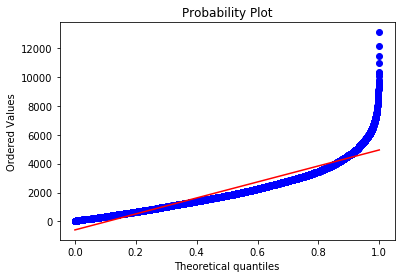

In [32]:
import pylab
import scipy.stats as stats
quantile = train.Item_Outlet_Sales
stats.probplot(quantile, dist="uniform", plot=pylab)
pylab.show()

In [33]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

In [34]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
'''le = LinearRegression(normalize = True)
predictors = [x for x in train.columns if x not in [target]+IDcol]
la = Lasso(alpha = 0.05,normalize = True)'''

'le = LinearRegression(normalize = True)\npredictors = [x for x in train.columns if x not in [target]+IDcol]\nla = Lasso(alpha = 0.05,normalize = True)'

In [35]:
#la.fit(train[predictors],train[target])
#coef1 = pd.Series(la.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients', figsize=(10,6))

In [36]:
from sklearn import metrics
from sklearn.model_selection import cross_validate, cross_val_score
import matplotlib.pyplot as plt

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename, resid=False, transform=False):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    residuals = dtrain_predictions - dtrain[target]
    if(transform == True):
        train_mod = train.copy(deep = True)
        train_mod[target] = train_mod[target].apply(np.log)
        dtrain_predictions = np.exp(dtrain_predictions)
        #print(dtrain_predictions)

    
    #residuals vs fitted plot
    if(resid == True):
        plt.scatter(dtrain_predictions, residuals)
        plt.xlabel('fitted values')
        plt.ylabel('residuals')
        plt.show()
    
    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)
    

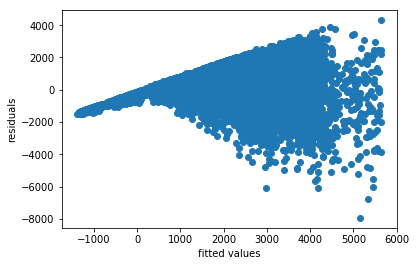


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.53 | Min - 1075 | Max - 1211


c:\python27\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


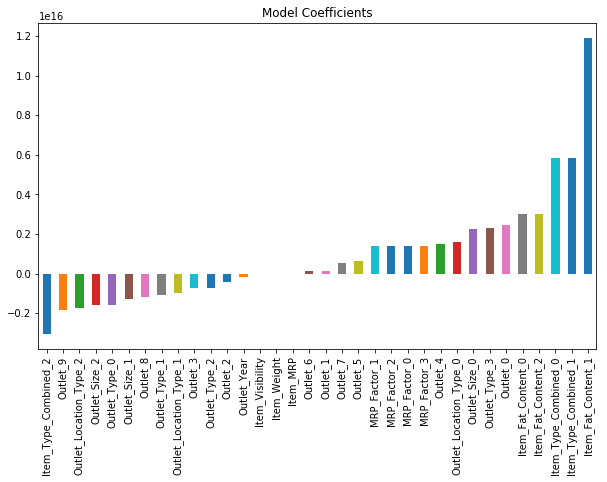

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
pred1 = np.nan
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv', resid=True)


coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients', figsize=(10,6))


In [38]:
alg2 = Ridge(alpha = 0.05, normalize = True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')


Model Report
RMSE : 1130
CV Score : Mean - 1132 | Std - 43.44 | Min - 1071 | Max - 1218


c:\python27\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
RMSE : 1128
CV Score : Mean - 1129 | Std - 43.78 | Min - 1075 | Max - 1211


c:\python27\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


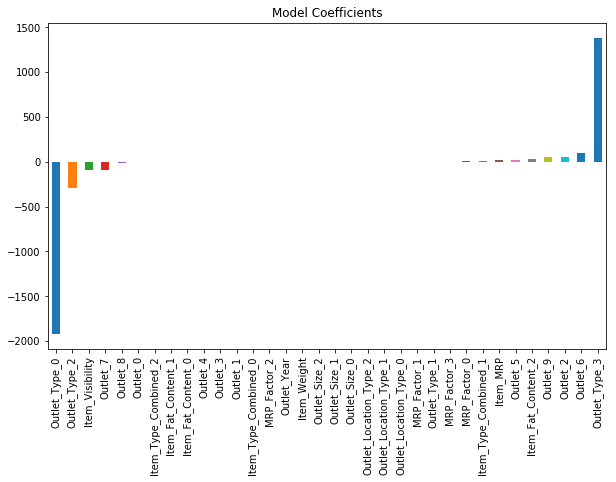

In [39]:

alg3 = Lasso(alpha=0.05,normalize=True)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg3.csv')
coef3 = pd.Series(alg3.coef_, predictors).sort_values()
coef3.plot(kind='bar', title='Model Coefficients', figsize=(10,6))
